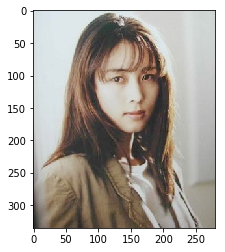

In [8]:
#----------------------BRAINTELS LABS -----------------------
#---------------IMAGE PROCESSING, ARTIFICIAL INTELLIGENCE AND EMBEDDED SYSTEMS ---------------
#USO DE PCA PARA LA REDUCCIÓN DE DIMENSIONES DE IMAGENES Y HAARCASCADE PARA LA DETECCIÓN
#DE ROSTROS SOBRE IMAGENES EN ESCALA DE GRISES
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
#leer una imagen
img=plt.imread("izumi.jpg")
plt.imshow(img)

DETECCIÓN DE ROSTRO


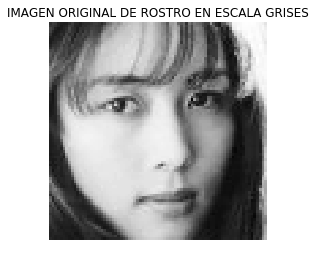

In [9]:
#Objeto CascadeClassifier para encontrar rostros
faces=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
#Cambiar a escala de GRISES
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#DETECTAR ROSTROS MEDIANTE EL MÉTODO detectMultiScale
rostro=faces.detectMultiScale(img_gray,1.3,5)
#bucle for para acceder a cada parametro del rectangulo que encierra al rostros
for x,y,w,h in rostro:
    img2=img[y:y+h,x:x+w,:]
    img2=cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)
    #guardar la imagen
    cv2.imwrite("crop.jpg",img2)
#si se encontro entonces
if img2 is not None:
    #determinar filas y columnas
    Nf=img2.shape[0]
    Nc=img2.shape[1]
    #convertir a escala de grises
    img2_gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #realizar un cambio de dimension a una imagen de 80x80
    img2_gray=cv2.resize(img2_gray,(80,80),interpolation=cv2.INTER_CUBIC)
    print("DETECCIÓN DE ROSTRO")
    #mostrar la imagen
    plt.imshow(img2_gray,cmap=plt.cm.gray)
    plt.title("IMAGEN ORIGINAL DE ROSTRO EN ESCALA GRISES")
    plt.axis("off")
    #crear objeto PCA
    niveles=range(2,80,10)
    #crear lista con los componentes PCA de distintos niveles
    pca_objects=[PCA(n_components=comp) for comp in niveles]
    #titulos de los componentes
    pca_titles=["{} N° DE: ".format(titulo)+"PCA" for titulo in niveles]
    #reducir dimensiones de cada objeto PCA
    pca_vals=[pca.fit_transform(img2_gray) for pca in pca_objects]
else:
    print("No existe rostro para realizar la reducción de dimensiones PCA")

                   ======================= BRAINTELS LABS ===================================
EL ANALISIS MEDIANTE COMPONENTES PRINCIPALES PCA SE ENFOCA EN REDUCIR LAS DIMENSIONES DE UN VECTOR MEDIANTE LA PROYECCIÓN DEL VECTOR SOBRE UNOS VECTORES DENOMINADOS AUTOVECTORES (EIGENVECTORS) CON EL FIN DE QUE LOS VALORES PROYECTADOS POSEAN  LA MAYOR INFORMACIÓN POSIBLE, EN ESTE CASO ES USADO  IMAGENES DEL ROSTRO QUE SE PROYECTARAN SOBRE LOS AUTOVECTORES QUE SE CALCULAN A PARTIR DE LA MATRIZ DE CORRELACIÓN DE LA IMAGEN DE ENTRADA. 
CUANDO SE APLICA EL ANALISIS PCA SOBRE ROSTROS , ESTE ALGORITMO ES CONOCIDO COMO EIGEN-FACES.
EL OBJETO DEL PCA ES DE ELIMINAR COMPONENTES QUE SON REDUNDANTES Y QUE NO APORTAN INFORMACIÓN EN LO ABSOLUTO , POR LO TANTO ESTA TECNICA PERMITE REDUCIR LAS DIMENSIONES DE TAL MANERA QUE SOLO AQUELLOS COMPONENTES QUE POSEAN ALTO VALOR DE VARIANZA O INFORMACIÓN PUEDAN SER UTILIZADOS COMO COMPONENTES PRINCIPALES .

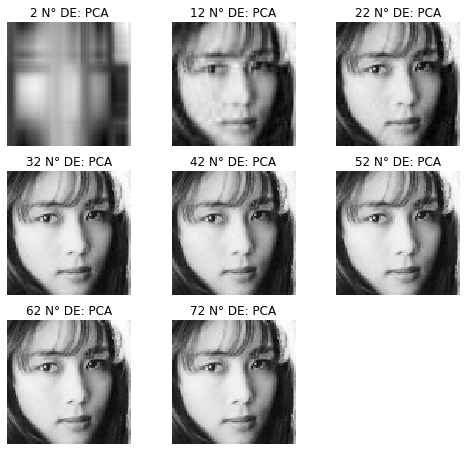

In [10]:
#realizar la transformación inversa de PCA para recuperar las imagenes
#parametros par adefinir el subplot
n_cols=3
n_rows=4
L=range(len(pca_objects))
plt.figure(figsize=(2.2 * n_cols, 2.2 * n_rows))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
for pca,X,titulo,i in zip(pca_objects,pca_vals,pca_titles,L):
    #en cada cuadro graficar la imagen con los componentes PCA utilizados
    plt.subplot(n_rows,n_cols,i+1)
    #recuperar imagen
    img2_rec=pca.inverse_transform(X)
    #mostrar cada imagen con sus respectivo PCA
    plt.imshow(img2_rec,cmap=plt.cm.gray)
    plt.title(titulo)
    plt.axis("off")
    plt.xticks(())
    plt.yticks(())

    



In [ ]:
#BRAINTELS LABS 